Collinearity is a situation where two attributes are linearly associated in both strength and direction 
implyting that movement of one variable stongly influences the other. It’s often measured using Pearson’s correlation coefficient. 
Collinearity between more than two predictors is also possible and frequently found in dataset.

Multicollinearity is a case of collinearity where a feature exhibits a linear relationship 
with two or more attributes. 
We can also have a situation where more than two features are correlated and, at the same time, 
have no high correlation pairwise. Multicollinearity can be a significant problem in regression modelling because this
phenomena violates the assumptions of a regression model.


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
os.chdir('/Users/apple/Downloads/data')


In [122]:
## create column names
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

## read data
boston = pd.read_csv('housing.csv',header = None, delimiter = r"\s+",names = col_names)
# read few lines
print(boston.head(2))

bmi = pd.read_csv('bmi.csv')
print(bmi.head(1))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   

   PTRATIO      B  LSTAT  MEDV  
0     15.3  396.9   4.98  24.0  
1     17.8  396.9   9.14  21.6  
  Gender  Height  Weight  Index
0   Male     174      96      4


In [35]:
bmi['Gender']= bmi['Gender'].map({'Male':0, 'Female':1})
bmi.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


The correlation matrix summarizes the pairwise correlation or bivariate relationship between two independent variables - collinearity. It is a table which displays the correlation coefficients for different variables. It takes an input relation with numerical columns  and calculates Pearson Correlation Coefficient between each pair of its input columns.
The matrix shows the correlation between all the possible pairs of values in a table. Correlation varies between -1 to +1 and 0 means there is no correlation between two variables.

Text(0.5, 1.0, 'BMI Correlation Heatmap')

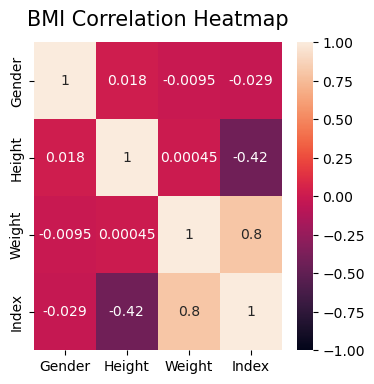

In [38]:
### Plotting the correlation between various columns
plt.figure(figsize = (4,4))
heatmap = sns.heatmap(bmi.corr(),vmin = -1, vmax = 1 , annot = True )
plt.title('BMI Correlation Heatmap', fontdict = {'fontsize' : 15}, pad = 12)

Text(0.5, 1.0, 'Housing Correlation Heatmap')

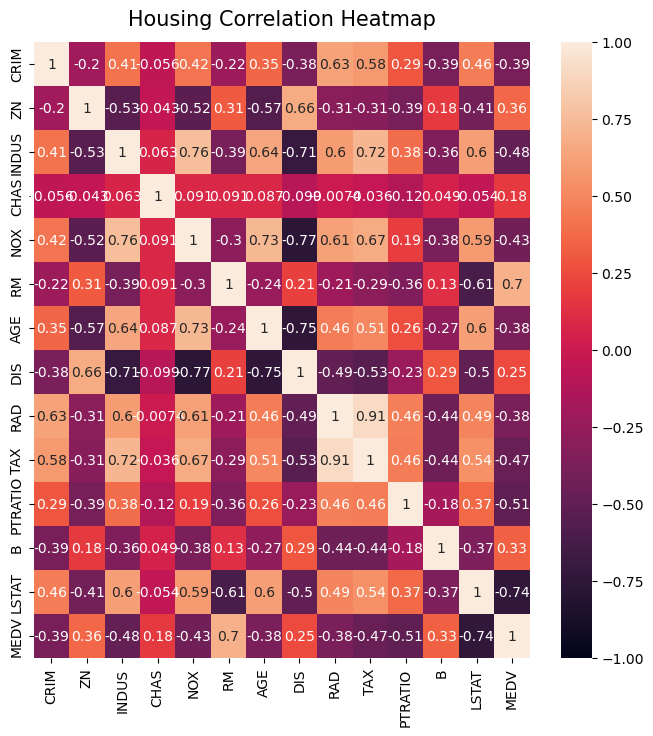

In [41]:
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(boston.corr(), vmin = -1, vmax = 1, annot = True)
plt.title('Housing Correlation Heatmap', fontdict = {'fontsize': 15}, pad = 12)

Variables which show strength than 0.7 are highly correlated

## Clustermap
Clustermap table shows not only all correlation between variables, but also group (cluster) relationships.

<Figure size 400x400 with 0 Axes>

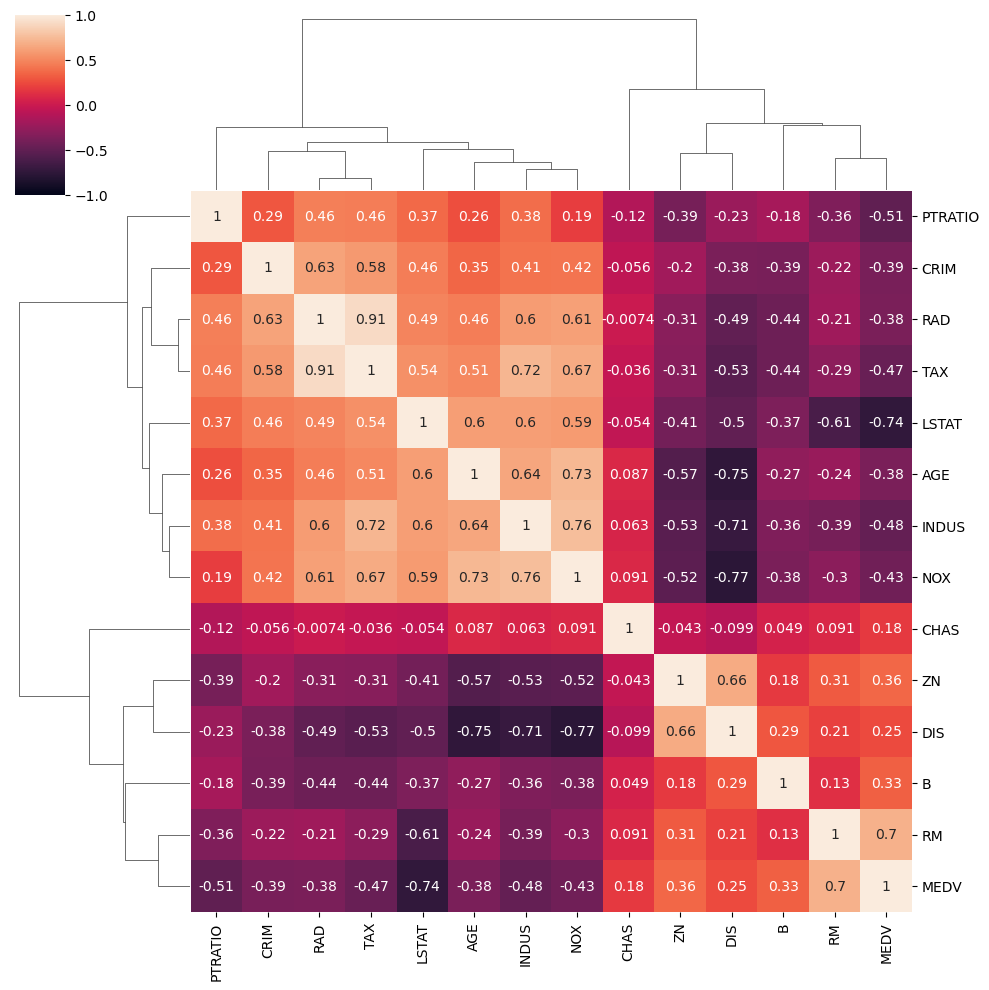

In [43]:
plt.figure( figsize = (4,4))
sns.clustermap(boston.corr(), vmin = -1, vmax = 1, annot = True)

Text(0.5, 1.0, 'BMI Clustermap')

<Figure size 100x100 with 0 Axes>

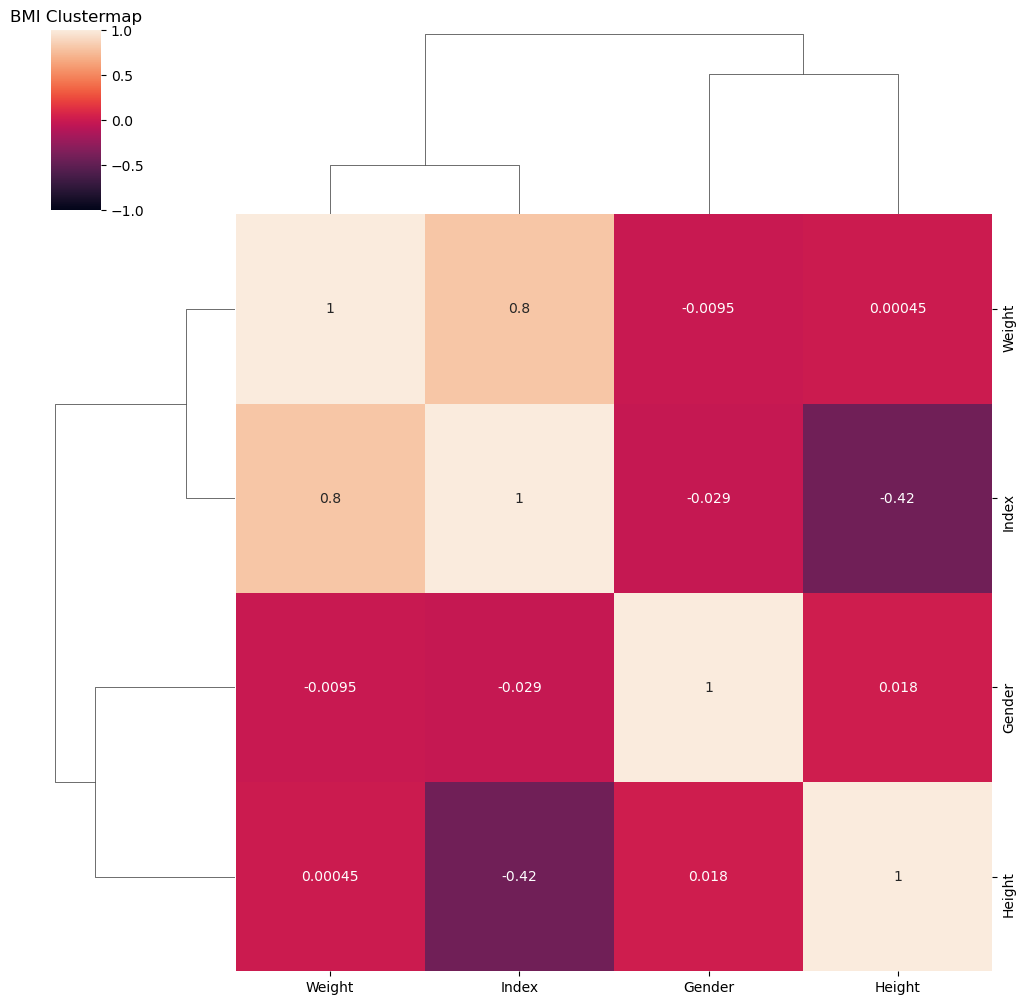

In [46]:
plt.figure( figsize = (1,1))
sns.clustermap(bmi.corr(), vmin = -1, vmax = 1, annot = True)
plt.title('BMI Clustermap')

##  Variance inflation factor or VIF
A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. 
VIF is used to identify the correlation of one independent variable with a group of other variables.


A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. VIF is used to identify the correlation of one independent variable with a group of other variables.
𝑉𝐼𝐹𝑖=1/(1−𝑅2𝑖)

In regression analysis, multicollinearity exists when two or more of the variables demonstrate a linear relationship between them. The VIF measures by how much the linear correlation of a given regressor with the other regressors increases the variance of its coefficient estimate with respect to the baseline case of no correlation.
VIF tells us the factor by which the correlations amongst the predictors inflate the variance. For example, a VIF of 10 indicates that the existing multicollinearity is inflating the variance of the coefficients 10 times compared to a no multicollinearity model.
VIFs do not have any upper limit. The lower the value the better. Values of more than 4 or 5 are sometimes regarded as being moderate to high, with values of 10 or more being regarded as very high.

Therefore a VIF = 5 is often taken as a threshold. Which means that any independent variable greater than 5 will have to be removed. Although the ideal threshold value depends upon the case

## Two kinds of multicollinearity¶
Data-based multicollinearity: this type of multicollinearity is present in the data itself. Observational experiments are more likely to exhibit this kind of multicollinearity.
Example: two identical (or almost identical) variables. Weight in pounds and weight in kilos, or investment income and savings/bond income.
Structural multicollinearity: caused by the researcher creating new predictor variables. This type occurs when we create a model term using other terms. In other words, it’s a byproduct of the model that we specify.

In [56]:
## VIF for BMI

VIF_df = pd.DataFrame()
VIF_df['feature'] = bmi.columns
VIF_df['VIF'] = [variance_inflation_factor(bmi.values, i) for i in range(len(bmi.columns))]
VIF_df
# Weight has a VIF of 40 (could be an example of database multicollenierity) 
# Index has a VIF of 25 (structural multicollinearity)

,feature,VIF
0,Gender,2.031010
1,Height,11.941301
2,Weight,40.024880
3,Index,25.143752


In [60]:
## VIF for Boston
VIF_boston = pd.DataFrame()
VIF_boston['feature'] = boston.columns
VIF_boston['VIF'] = [variance_inflation_factor(boston.values, i) for i in range(len(boston.columns))]
VIF_boston

# there are many variables like NOX, RM, TAX are highly correlated

,feature,VIF
0,CRIM,2.131404
1,ZN,2.910004
2,INDUS,14.485874
3,CHAS,1.176266
4,NOX,74.004269
5,RM,136.101743
6,AGE,21.398863
7,DIS,15.430455
8,RAD,15.369980
9,TAX,61.939713


## How does multicollinearity affect model performance

multicollinearity afffects the model performance in many ways. The model coefficients become sensitive to any minute changes in the data increasing the variance of the model. Lets compare different models with or without multicollinearity.

In [61]:
# let create data frame by dropping few features based on the value of VIF.
# Note- we shoold drop variables one by one iteratively after checking the results.
VIF_boston
# lets drop RM

,feature,VIF
0,CRIM,2.131404
1,ZN,2.910004
2,INDUS,14.485874
3,CHAS,1.176266
4,NOX,74.004269
5,RM,136.101743
6,AGE,21.398863
7,DIS,15.430455
8,RAD,15.369980
9,TAX,61.939713


In [68]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_2 = boston[col_names]
VIF_boston_2 = pd.DataFrame()
VIF_boston_2['feature'] = boston_2.columns
VIF_boston_2['VIF'] = [variance_inflation_factor(boston_2.values, i) for i in range(len(boston_2.columns))]
VIF_boston_2


,feature,VIF
0,CRIM,2.110287
1,ZN,2.889159
2,INDUS,14.202832
3,CHAS,1.174535
4,NOX,62.073615
5,AGE,20.752654
6,DIS,14.258330
7,RAD,15.134503
8,TAX,61.603579
9,PTRATIO,69.068505


In [76]:
# let's drop the attribute PTRATIO

col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT', 'MEDV']
VIF_boston3 = pd.DataFrame()
boston_3 = boston_2[col_names]
VIF_boston3['feature'] = boston_3.columns
VIF_boston3['VIF'] = [variance_inflation_factor(boston_3.values, i) for i in range(len(boston_3.columns))]
VIF_boston3                    

,feature,VIF
0,CRIM,2.104099
1,ZN,2.558330
2,INDUS,14.147928
3,CHAS,1.162582
4,NOX,59.247225
5,AGE,20.427509
6,DIS,9.639018
7,RAD,15.130157
8,TAX,58.759509
9,B,19.222365


In [77]:
# let's drop the attribute NOX 
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT', 'MEDV']
VIF_boston4 = pd.DataFrame()
boston_4 = boston_3[col_names]
VIF_boston4['feature'] = boston_4.columns
VIF_boston4['VIF'] = [variance_inflation_factor(boston_4.values, i) for i in range(len(boston_4.columns))]
VIF_boston4

,feature,VIF
0,CRIM,2.103346
1,ZN,2.548017
2,INDUS,13.152242
3,CHAS,1.161474
4,AGE,17.056895
5,DIS,9.446150
6,RAD,15.049247
7,TAX,54.753156
8,B,18.593595
9,LSTAT,11.031436


In [78]:
# let's drop the attribute TAX 
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT', 'MEDV']
VIF_boston5 = pd.DataFrame()
boston_5 = boston_4[col_names]
VIF_boston5['feature'] = boston_5.columns
VIF_boston5['VIF'] = [variance_inflation_factor(boston_5.values, i) for i in range(len(boston_5.columns))]
VIF_boston5

,feature,VIF
0,CRIM,2.103261
1,ZN,2.465535
2,INDUS,9.024818
3,CHAS,1.142745
4,AGE,16.449470
5,DIS,8.722321
6,RAD,4.858231
7,B,18.131319
8,LSTAT,10.934458
9,MEDV,11.385287


In [79]:
# let's drop the attribute B
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'LSTAT', 'MEDV']
VIF_boston6 = pd.DataFrame()
boston_6 = boston_5[col_names]
VIF_boston6['feature'] = boston_6.columns
VIF_boston6['VIF'] = [variance_inflation_factor(boston_6.values, i) for i in range(len(boston_6.columns))]
VIF_boston6



,feature,VIF
0,CRIM,2.095925
1,ZN,2.421949
2,INDUS,8.855666
3,CHAS,1.142321
4,AGE,15.731199
5,DIS,6.518545
6,RAD,4.733212
7,LSTAT,10.641862
8,MEDV,8.500366


In [80]:
# let's drop the attribute Age
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'LSTAT', 'MEDV']
VIF_boston7 = pd.DataFrame()
boston_7 = boston_6[col_names]
VIF_boston7['feature'] = boston_7.columns
VIF_boston7['VIF'] = [variance_inflation_factor(boston_7.values, i) for i in range(len(boston_7.columns))]
VIF_boston7


,feature,VIF
0,CRIM,2.095110
1,ZN,2.317242
2,INDUS,8.044685
3,CHAS,1.141690
4,DIS,6.395977
5,RAD,4.727054
6,LSTAT,7.012987
7,MEDV,5.630097


In [81]:
# lets use the attributes of the last DF where features are all < 10
VIF_boston7['feature']

0     CRIM
1       ZN
2    INDUS
3     CHAS
4      DIS
5      RAD
6    LSTAT
7     MEDV
Name: feature, dtype: object

## Regression model performance comparison

In [83]:
scaled_boston = boston.copy()
from sklearn.preprocessing import StandardScaler

col_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features = scaled_boston[col_names]

## scaling the data
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_boston[col_names] = features
# x is until the last attribute
X = scaled_boston.iloc[:, :-1].values
# y is the last attribute
y = scaled_boston.iloc[:, -1].values

## Regression Evaluation Metrics
Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1/𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|
 
Mean Squared Error (MSE) is the mean of the squared errors:

1/𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

1/𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2
 
Comparing these metrics:

MAE the average error. The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

MSE because MSE "punishes" larger errors, which tends to be useful in the real world. Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

RMSE is interpretable in the "y" units. Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.

All of these are loss functions, because we want to minimize them.

R-squared The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. When R² is high, it represents that the regression can capture much of variation in observed dependent variables. That’s why we can say the regression model performs well when R² is high.
It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one. One misconception about regression analysis is that a low R-squared value is always a bad thing. For example, some data sets or fields of study have an inherently greater amount of unexplained variation. In this case, R-squared values are naturally going to be lower. Investigators can make useful conclusions about the data even with a low R-squared value.

𝑅2𝑎𝑑𝑗.=1−(1−𝑅2)∗𝑛−1𝑛−𝑝−1
 
Adjusted R squared is a modified version of R square, and it is adjusted for the number of independent variables in the model, and it will always be less than or equal to R².In the formula below n is the number of observations in the data and k is the number of the independent variables in the data.

## let's build regression model with all the features

In [85]:
# lets seperate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [87]:
from sklearn.linear_model import LinearRegression

# Creating and training model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lm.predict(X_test)

In [91]:
# prediction of cross validation score
cv_lm = cross_val_score(estimator= lm, X = X_train, y = y_train, cv = 10)

# calculate adjusted r squared
r2 = lm.score(X_test, y_test)

# number of features along axis 0
n = X_test.shape[0]
# number of features along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
lm_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
lm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
lm_R2 = lm.score(X_test, y_test)
lmCV_R2 = cv_lm.mean()

# print the error metric
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( lm.score(X_test, y_test),4) )
print('Adjusted R2:', round(lm_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_lm.mean(),4) )

RMSE: 4.6387
R2: 0.7112
Adjusted R2: 0.684
Cross Validated R2:  0.6875


Text(0.5, 1.0, 'Linear regression with all features')

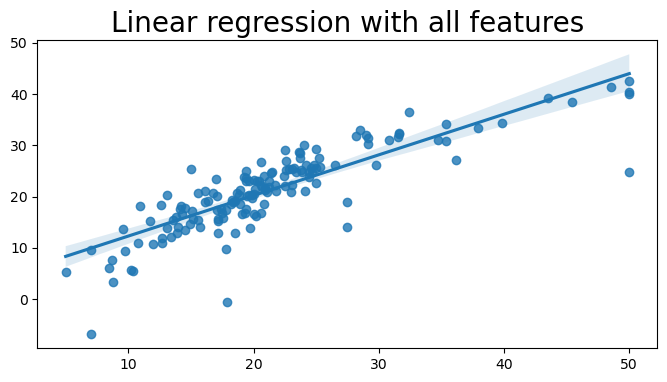

In [93]:
# plot
plt.figure(figsize = (8,4))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear regression with all features', fontsize = 20)

## Linear Regressin after droping features using VIF

In [103]:
from sklearn.preprocessing import StandardScaler

VIF_boston7['feature']

scaled_boston = boston.copy()

col_names = ['CRIM', 'ZN', 'INDUS', 'DIS', 'RAD',  'LSTAT' , 'MEDV']
features = scaled_boston[col_names]

## scaling the data
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_boston[col_names] = features
# x is until the last attribute
X = scaled_boston.iloc[:, :-1].values
# y is the last attribute
y = scaled_boston.iloc[:, -1].values

# split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [104]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

# Predicting Cross Validation Score
cv_lm2 = cross_val_score(estimator = lm2, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = lm2.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
lm2_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
lm2_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
lm2_R2 = lm2.score(X_test, y_test)
lm2CV_R2 = cv_lm2.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( lm2.score(X_test, y_test),4) )
print('Adjusted R2:', round(lm2_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_lm2.mean(),4) )

RMSE: 22.6567
R2: 0.7112
Adjusted R2: 0.684
Cross Validated R2:  0.6875


## As we can see there is not much improvement in cross validated R2 - even after dropping columns based on VIF. it is always not an optimal approach.
## We can still improve the model with different approaches.

## Random Forest model after droping features using VIF

In [121]:
# create random forest model and predict on test data
from sklearn.ensemble import RandomForestRegressor

RF_regressor = RandomForestRegressor(n_estimators = 10, random_state=0)
RF_regressor.fit(X_train, y_train)
y_pred = RF_regressor.predict(X_test)

# calculate RF cross validated score
cv_rf = cross_val_score(estimator = RF_regressor,X =  X_train, y =y_train, cv = 10)

# Calculating Adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]

# Adjusted R-squared formula
r2 = RF_regressor.score(X_test, y_test)
rf2_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
rf2_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rf2_R2 = RF_regressor.score(X_test, y_test)
rf2CV_R2 = cv_rf.mean()


print('RMSE:', round(rf2_RMSE, 4))
print('R2:', round(rf2_R2,4))
print('Adjusted_R2:', round(rf2_adjusted_r2, 4))
print('Cross Validated R2:', round(rf2CV_R2,4))


RMSE: 0.3676
R2: 0.8469
Adjusted_R2: 0.8325
Cross Validated R2: 0.8201


## How to interpret the error metric of the regression model
Adjusted R2 is a better indicator of a regression model performance because it 
is an unbiased estimate of the fraction of the variance explained considering the sample size and number of variables.
RMSE is good if it is low.
RMSE close to zero and R-Square approaching 1 are indicative of high accuracy between observed and predicted values.so 
we can see Random forest regressor performing  better after dropping highly correlated features.

But, random forest is a tree based model which performs reasonably well even when multicollenearity is present in the data.
We want to see the performance of RF on original data set without dropping features.

In [130]:
print(boston.head())## original data set
# we will directly create RF model on this data
X = boston.iloc[:, :-1] # select x's untill the last value
y = boston.iloc[:,-1] # select the last value
print(X.shape)
print(y.shape)

## split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
print('X_train:', X_train.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
(506, 13)
(506,)
X_train: (354, 13)


In [131]:
# train the RF model on newly split data
RF_regressor = RandomForestRegressor(n_estimators = 10, random_state=0)
RF_regressor.fit(X_train, y_train)
y_pred = RF_regressor.predict(X_test)

# calculate RF cross validated score
cv_rf = cross_val_score(estimator = RF_regressor,X =  X_train, y =y_train, cv = 10)

# Calculating Adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]

# Adjusted R-squared formula
r2 = RF_regressor.score(X_test, y_test)
rf2_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
rf2_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rf2_R2 = RF_regressor.score(X_test, y_test)
rf2CV_R2 = cv_rf.mean()


print('RMSE:', round(rf2_RMSE, 4))
print('R2:', round(rf2_R2,4))
print('Adjusted_R2:', round(rf2_adjusted_r2, 4))
print('Cross Validated R2:', round(rf2CV_R2,4))


RMSE: 3.3386
R2: 0.8504
Adjusted_R2: 0.8363
Cross Validated R2: 0.8162


Conclusively RMSE is relatively higher but not very high and Adjusted R2 and Cross validated R2 values are good and
explains the variance well. so As we can see RandomForest performs well  on data with collinear variables


## Recursive Feature Elimination (RFE)

Another method for feature selection.
Recursive Feature Elimination (RFE) is a backward feature selection algorithm.

The algorithn eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features, determined by either the coef_ or featureimportances attribute of the fitted model.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features.

Not all models can be paired with the RFE method, and some models benefit more from RFE than others. Because RFE requires that the initial model uses the full predictor set, then some models cannot be used when the number of predictors exceeds the number of samples. These models include multiple linear regression, logistic regression, and linear discriminant analysis. If we desire to use one of these techniques with RFE, then the predictors must first be winnowed down. In addition, some models benefit more from the use of RFE than others. Random forest is one such model (Svetnik et al. 2003).

Backwards selection is frequently used with random forest models for two reasons:

random forest tends not to exclude variables from the prediction equation;
it has an internal method for measuring feature importance.

In [143]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

RF_feature_select = RFE(estimator= RandomForestRegressor(), n_features_to_select = 7 )
model = RandomForestRegressor()
rf_pipeline = Pipeline(steps = [('s',RF_feature_select),('m',model)])
rf_pipeline.fit(X_train,y_train)

# predictions
y_pred = rf_pipeline.predict(X_test)

# predict cross validation score
cv_rf_pipeline = cross_val_score(estimator= rf_pipeline, X = X_train, y= y_train, cv = 10)
r2 = rf_pipeline.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# calcute error metric
rf_pipeline_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
rf_pipeline_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rf_pipeline_R2 = rf_pipeline.score(X_test, y_test)
rf_pipelineCV_R2 = cv_rf_pipeline.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( rf_pipeline.score(X_test, y_test),4) )
print('Adjusted R2:', round(rf_pipeline_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_rf_pipeline.mean(),4) )

RMSE: 3.1773
R2: 0.8645
Adjusted R2: 0.8518
Cross Validated R2:  0.8151


RMSE is slightly better than the previous model and adjusted R2 slightly increaed.